In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn import tree


In [2]:
# 1. Train a Decision Tree Classifier on the Iris dataset and print accuracy
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0


In [3]:
# 2. Train a Decision Tree Classifier using Gini Impurity and print feature importances
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("Feature Importances:", clf_gini.feature_importances_)


Feature Importances: [0.         0.01667014 0.40593501 0.57739485]


In [4]:
# 3. Train a Decision Tree Classifier using Entropy and print accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Model Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Model Accuracy (Entropy): 1.0


In [5]:
# 4. Train a Decision Tree Regressor on a housing dataset and evaluate using MSE
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_reg))


Mean Squared Error: 0.48825262276068315


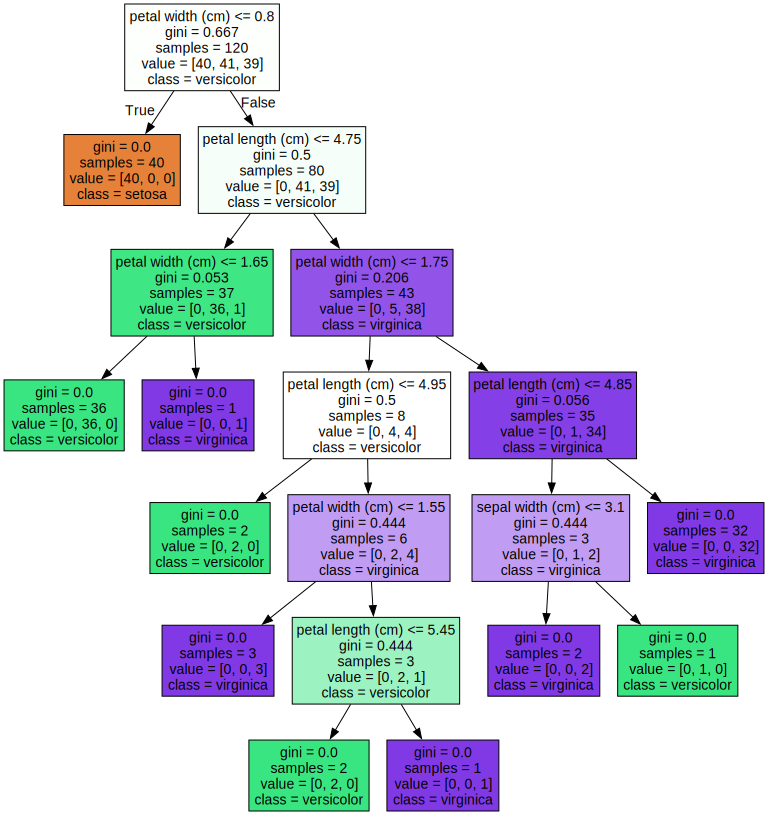

In [9]:
# 5. Train a Decision Tree Classifier and visualize it using graphviz
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)

# Manually specify the Graphviz binary path if necessary
graph.format = "png"
graph.render("decision_tree", directory=".", engine="dot")  # Adjust path if needed

from IPython.display import display
display(graph)

In [12]:
# 6. Train a Decision Tree Classifier with max_depth=3 and compare with a fully grown tree

# Load and split the Iris dataset for classification tasks
iris = load_iris()
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Load and split the California housing dataset for regression tasks
housing = fetch_california_housing()
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42
)

# Train a Decision Tree Regressor on the housing dataset
regressor = DecisionTreeRegressor()
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))

# Train Decision Tree Classifier with max_depth=3
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train_clf, y_train_clf)
y_pred_depth3 = clf_depth3.predict(X_test_clf)

print("Accuracy (Max Depth 3):", accuracy_score(y_test_clf, y_pred_depth3))
print("Accuracy (Fully Grown Tree):", accuracy_score(y_test_clf, y_pred))



Mean Squared Error: 0.48799539389447666
Accuracy (Max Depth 3): 1.0
Accuracy (Fully Grown Tree): 1.0


In [14]:
# 7. Train a Decision Tree Classifier with min_samples_split=5 and compare with default tree

clf_min_samples = DecisionTreeClassifier(min_samples_split=5)
clf_min_samples.fit(X_train_clf, y_train_clf)
y_pred_min_samples = clf_min_samples.predict(X_test_clf)

print("Accuracy (Min Samples Split=5):", accuracy_score(y_test_clf, y_pred_min_samples))


Accuracy (Min Samples Split=5): 1.0


In [17]:
# 8. Apply feature scaling before training a Decision Tree Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clf)
X_test_scaled = scaler.transform(X_test_clf)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train_clf)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
print("Accuracy with Scaled Features:", accuracy_score(y_test_clf, y_pred_scaled))


Accuracy with Scaled Features: 1.0


In [19]:
# 9. Train a Decision Tree Classifier using One-vs-Rest (OvR) strategy from sklearn.multiclass
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train_clf, y_train_clf)
y_pred_ovr = ovr_clf.predict(X_test_clf)
print("OvR Accuracy:", accuracy_score(y_test_clf, y_pred_ovr))


OvR Accuracy: 1.0


In [20]:
# 10. Train a Decision Tree Classifier and display feature importance scores
print("Feature Importance Scores:", clf.feature_importances_)


Feature Importance Scores: [0.         0.01667014 0.40593501 0.57739485]


In [30]:
# 11. Train a Decision Tree Regressor with max_depth=5 and compare performance with unrestricted tree

regressor_depth5 = DecisionTreeRegressor(max_depth=5)
regressor_depth5.fit(X_train, y_train)  # Use the regression dataset
y_pred_depth5 = regressor_depth5.predict(X_test)

print("MSE (Max Depth 5):", mean_squared_error(y_test, y_pred_depth5))
print("MSE (Unrestricted Tree):", mean_squared_error(y_test, y_pred_reg))


MSE (Max Depth 5): 0.5245146178314736
MSE (Unrestricted Tree): 0.48799539389447666


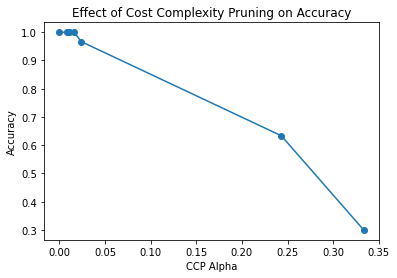

In [24]:
# 12. Train a Decision Tree Classifier and apply Cost Complexity Pruning (CCP)
path = clf.cost_complexity_pruning_path(X_train_clf, y_train_clf)
ccp_alphas = path.ccp_alphas
accuracy_scores = []

for alpha in ccp_alphas:
    pruned_clf = DecisionTreeClassifier(ccp_alpha=alpha)
    pruned_clf.fit(X_train_clf, y_train_clf)
    accuracy_scores.append(accuracy_score(y_test_clf, pruned_clf.predict(X_test_clf)))

plt.plot(ccp_alphas, accuracy_scores, marker='o')
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.show()


In [26]:
# 13. Train a Decision Tree Classifier and evaluate using Precision, Recall, and F1-Score
print("Classification Report:\n", classification_report(y_test_clf, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



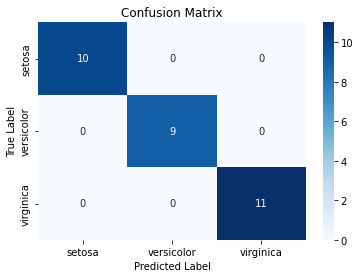

In [28]:
# 14. Train a Decision Tree Classifier and visualize the confusion matrix using seaborn
cm = confusion_matrix(y_test_clf, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [29]:
# 15. Train a Decision Tree Classifier and use GridSearchCV to find optimal max_depth and min_samples_split
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_clf, y_train_clf)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Accuracy: 0.9416666666666668
